# <center>Representación de grafos en Python</center>
El software libre más conocido para la creación de grafos es [Graphviz](https://es.wikipedia.org/wiki/Graphviz), el cual usa el lenguaje descriptivo [DOT](https://es.wikipedia.org/wiki/DOT). Para no aprender otro lenguaje más para el simple cometido de crear grafos, podemos usar la implementación en Python de Graphviz:

- Instalación: `pip3 install graphviz`
- [Código fuente](https://github.com/xflr6/graphviz)
- [Referencia](https://graphviz.readthedocs.io/en/stable/api.html)

In [57]:
import graphviz as gv
print(gv.__version__)

from IPython.display import SVG

0.8.2


## Grafo simple 

In [58]:
# Crear un grafo con dos nodos
g1 = gv.Graph(format="svg") # Por defecto el formato será pdf
g1.node("A")  # Es lo mismo que name="A"
g1.node(name="B")

# Unir nodos de un gráfico
g1.edge("A", "B")

# Mostrar el código DOT equivalente
g1.source

'graph {\n\tA\n\tB\n\tA -- B\n}'

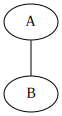

In [59]:
# Exportar un grafo
nombre_de_archivo = g1.render("img/g1")  # No hace falta indicar la extensión

# El nombre de archivo lo devuelve con la extensión
SVG(nombre_de_archivo)

_________________________________________

## Grafo con flechas 

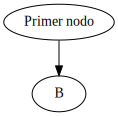

In [60]:
# Crear un grafo direccional
g2 = gv.Digraph(format="svg")
g2.node("A", label="Primer nodo")  # Las etiquetas reemplazan a los nombres de los nodos
g2.node("B")
g2.edge("A", "B")
SVG(g2.render("img/g2"))

___________________________________

## Aplicar estilos
Podemos cambiar el color, la forma, la fuente... de grafos, nodos y uniones.

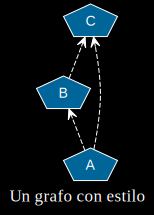

In [61]:
g3 = gv.Digraph(format="svg")

for n in ["A", "B", "C"]:
    g3.node(n)

for e in [("A", "B"), ("B", "C"), ("A", "C")]:
    g3.edge(*e)

# Actualizar estilos del grafo
g3.graph_attr.update({
    "label": "Un grafo con estilo", # Etiqueta del grafo
    "fontsize": "17",               # Tamaño de la fuente
    "fontcolor": "white",           # Color de la fuente
    "bgcolor": "#000000",            # Color de fondo
    "rankdir": "BT"                 # Dirección de las flechas, de abajo a arriba
})

# Actualizar estilos de los nodos
g3.node_attr.update({
    "fontname": "Arial",   # Tipo de fuente
    "shape": "pentagon",   # Forma de los nodos
    "fontcolor": "white",  # Color de la fuente
    "color": "white",      # Color del nodo
    "style": "filled",     # Estilo del color
    "fillcolor": "#006699" # Color del relleno
})

# Actualizar estilos de las uniones
g3.edge_attr.update({
    "style": "dashed",    # Estilo de las uniones (discontinuas)
    "color": "white",
    "arrowhead": "open",  # Estilo de las puntas de las flechas
})

SVG(g3.render("img/g3"))


________________________________________

## Aproximación con programación funcional
Podemos crear unas funciones de ayuda que nos permitan jugar fácilmente con los grafos, ya que la forma anterior de crearlos es demasiado ineficiente cuando tratamos con muchos nodos:

In [62]:
from functools import partial
graph = partial(gv.Graph, format="svg")
digraph = partial(gv.Digraph, format="svg")

# Ahora podemos crear gráficos en SVG simplemente ejecutando:
g4 = digraph()
g4.node("D")
g4.edge("D", "C", color="green")

________________________________

## Combinar grafos en subgrafos
Podemos añadir parte de un grafo a otro, siempre y cuando los grafos sean del mismo tipo.

In [66]:
g3.subgraph(g4)
SVG(g3.render("img/g3"))

__________________________________

## Visualizar grafos
Ahora no lo estoy haciendo así porque puedo abrirlo gŕaficamente en el notebook, pero si estamos en un entorno de puro Python la siguiente función puede serte muy útil: 

In [ ]:
# Visualizar grafos con el programa que tengas configurado 
# por defecto para abrir el tipo de archivo del cual se trata
gv.view("img/g3.svg")

_____________________________________________


> Fuentes:
- http://matthiaseisen.com/articles/graphviz/